### Import required libraries

In [10]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
CURR_DIR = os.path.dirname('__file__')
ROOT_DIR=os.path.join(os.getcwd() ,'..')
sys.path.append(ROOT_DIR)

from utilities.dataloader import check_and_update_csv, split_train_val_test, ConstructionDataset

## Task 0: Data loading

Task 0.1 Data cleaning
1. remove entries which do not exist
2. Visualize data distribution

In [11]:
data_dir = '../data' 
img_dir = os.path.join(data_dir, 'foundation_images/foundation_images')

##### Run the below code if running for the first time ######
##--> removes entries in the stage_labels.csv which do not exist and
##--> stores them in stage_labels_corr.csvs
# csv_file_path = os.path.join(data_dir,'stage_labels.csv')
# new_csv_file_path = os.path.join(data_dir,'stage_labels_corr.csv')

# check_and_update_csv(old_csv=csv_file_path, new_csv=new_csv_file_path, img_folders=img_dir)

In [12]:
dataframe = pd.read_csv(os.path.join(data_dir, 'stage_labels_corr.csv'),sep=";")

# Extract camera index, timestamp, and structure index from the filename
dataframe['camera'] = dataframe['imagename'].apply(lambda x: x.split('_')[0])
dataframe['timestamp'] = dataframe['imagename'].apply(lambda x: x.split('_')[1][1:])
dataframe['structure_index'] = dataframe['imagename'].apply(lambda x: int(x.split('_')[2].split('.')[0]))
dataframe['numbered_label'] = dataframe['label'].apply(lambda x: int(x.split('-')[1][0]))

In [13]:
class_labels = list(dataframe["label"].unique())
class_labels = class_labels[-1:]+class_labels[:-1]
class_labels

['Stage-0_Screed',
 'Stage-1_Rebar',
 'Stage-2_Formwork-1',
 'Stage-3_Concrete-1',
 'Stage-4_Formwork-2',
 'Stage-5_Concrete-2',
 'Stage-6_Soil']

In [14]:
# create dictionary of labels
class_labels_dict = {}
for i, item in enumerate(class_labels):
    class_labels_dict[i] = item
class_labels_dict

{0: 'Stage-0_Screed',
 1: 'Stage-1_Rebar',
 2: 'Stage-2_Formwork-1',
 3: 'Stage-3_Concrete-1',
 4: 'Stage-4_Formwork-2',
 5: 'Stage-5_Concrete-2',
 6: 'Stage-6_Soil'}

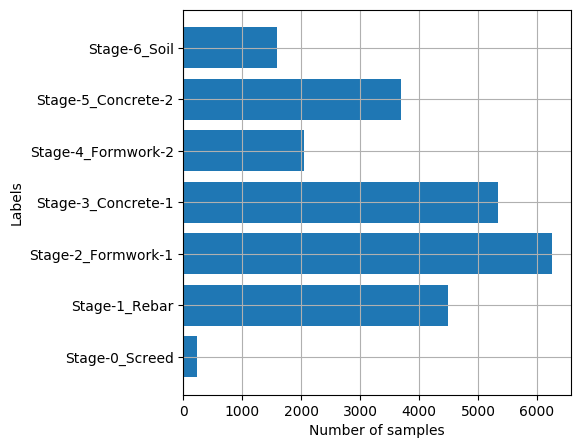

In [15]:
# Visualizing distribution of different samples of stages of construction
count = np.zeros(len(class_labels), dtype='int')
for i, item in enumerate(class_labels):
    count[i] = dataframe[dataframe['label']==item].size

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(class_labels, count)

plt.xlabel("Number of samples")
plt.ylabel("Labels")
plt.grid()
plt.show()

Task 0.2 Data pre-processing
1. Split data: train, val, test
2. Resize images to square-sized
3. Scale the data to [0,1]

In [16]:
# split data
train_df, val_df, test_df = split_train_val_test(data_dir, dataframe, save_as_csv=False)

In [17]:
input_size = 150 #number of features
# Define transformations
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)), 
    transforms.ToTensor(), # scales to [0.0,1.0]
])

# Create datasets and dataloaders
train_dataset = ConstructionDataset(train_df, img_dir, transform=transform)
val_dataset = ConstructionDataset(val_df, img_dir, transform=transform)
test_dataset = ConstructionDataset(test_df, img_dir, transform=transform)


print("Size of train, val, test set: %s, %s, %s" % (len(train_dataset), len(val_dataset), len(test_dataset)))

Size of train, val, test set: 2758, 791, 393


In [18]:
idx = 100
image, label = train_dataset[idx]
print("Image name, label: %s, %s" % (train_df["imagename"][idx], label))

Image name, label: cam1_f2023-06-25T10:30:20.246Z.jpg_3.png, 6


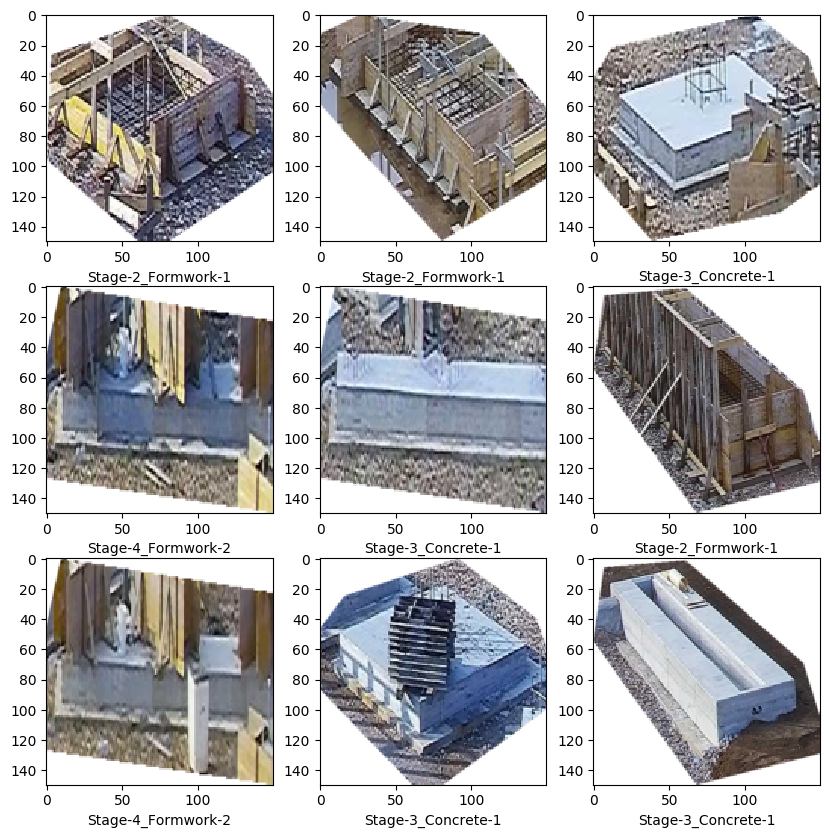

In [19]:
nrows=3
ncols=3
f, axs = plt.subplots(nrows, ncols, figsize=(10, 10))
for i in range(nrows):
    for j in range(ncols):
        axs[i][j].imshow(train_dataset[i*nrows + j][0].permute(1,2,0))
        axs[i][j].set_xlabel(class_labels_dict[train_dataset[i*nrows + j][1]])
plt.show()

## Task 1: Build a model:
1. Model 1: Simple image classification
2. Model 2: Time-series image classification
3. Model 3: Multi-layer multi-component model

Task 1--> `run_scripts/task1_cnn.ipynb`

Task 2--> `run_scripts/task2_lstm.ipynb` `run_scripts/task2_cnnlstm.ipynb`